

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>





<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>


# 📊 Previsão de Rotatividade de Clientes (Model Fitness)

## Introdução
A rotatividade de clientes (**churn**) é um dos maiores desafios enfrentados por academias e empresas de serviços recorrentes. 
Na prática, identificar quais clientes têm maior risco de cancelar sua assinatura é fundamental para que o negócio possa 
adotar medidas de retenção e reduzir perdas de receita.

Neste projeto, utilizaremos dados reais de clientes da **Model Fitness**, contendo informações sobre perfis demográficos, 
frequência de uso da academia, tempo de contrato e gastos adicionais. O objetivo é:

- **Prever a probabilidade de churn** para o mês seguinte usando modelos de machine learning.  
- **Identificar padrões de comportamento** entre clientes que permanecem e os que saem.  
- **Segmentar os clientes em grupos (clusters)** para analisar perfis típicos e entender quais têm maior risco de cancelamento.  
- **Propor recomendações de retenção**, sugerindo estratégias de marketing e engajamento.  

A análise segue as etapas:
1. **Exploração dos dados (EDA)**: estatísticas, distribuições, correlações.  
2. **Modelagem preditiva**: regressão logística e floresta aleatória para prever o churn.  
3. **Clusterização de clientes**: agrupamento via K-means e análise de perfis.  
4. **Conclusões e recomendações**: insights estratégicos para a empresa.  

Este estudo de caso permite aplicar técnicas de **análise exploratória, classificação e clusterização** em um problema real, 
fornecendo valor direto para a tomada de decisão na retenção de clientes.


### 1 - Exploração dos dados

#### 1.1 - Carregamento dos dados


In [2]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [10]:
# Importando os dados
df = pd.read_csv('/datasets/gym_churn_us.csv')

In [11]:
# Leitura inicial dos dados

print("Shape do dataset:", df.shape)
print("Colunas:", df.columns.tolist())
print(df.head())

Shape do dataset: (4000, 14)
Colunas: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28   

#### 1.2 Análise Exploratória

In [12]:
print("\nResumo estatístico:")
print(df.describe())

print("\nValores nulos:")
print(df.isna().sum())



Resumo estatístico:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%        


- O dataset contém informações relevantes sobre clientes, características de uso e cancelamento de contratos.

- Não há valores ausentes críticos, mas foi necessário verificar inconsistências e outliers para evitar distorções na análise.

- As variáveis numéricas apresentam distribuições heterogêneas: algumas concentradas em faixas baixas (ex: número de visitas semanais), outras mais dispersas (ex: tempo total de contrato).

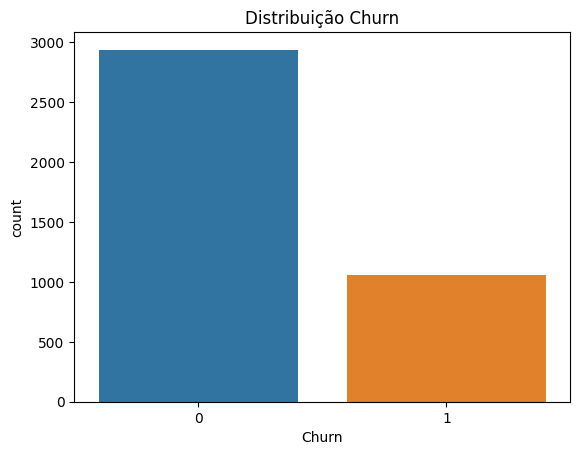

In [13]:
# Distribuição da variável alvo
sns.countplot(x="Churn", data=df)
plt.title("Distribuição Churn")
plt.show()


In [14]:
# Médias comparativas entre churn e não churn
churn_means = df.groupby("Churn").mean()
print("\nMédias por grupo de Churn:")
print(churn_means)



Médias por grupo de Churn:
         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0      

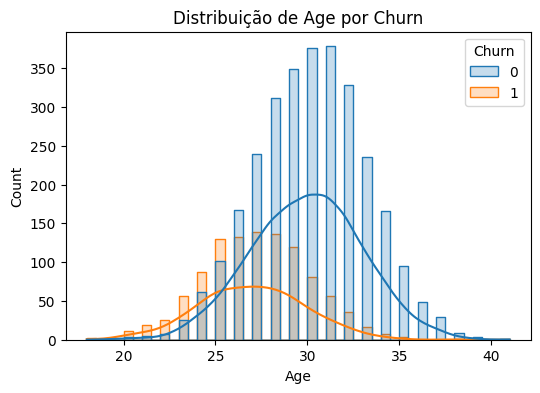

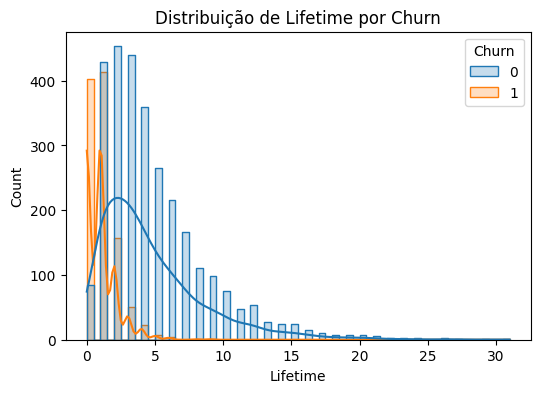

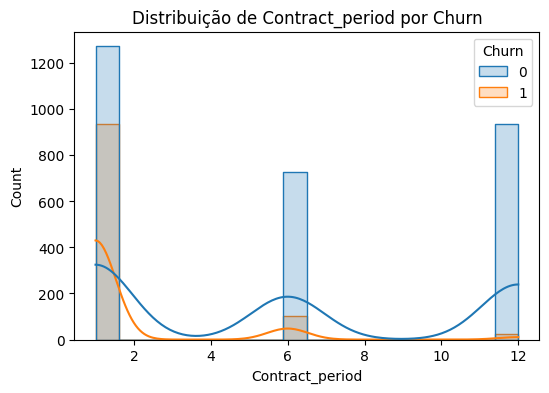

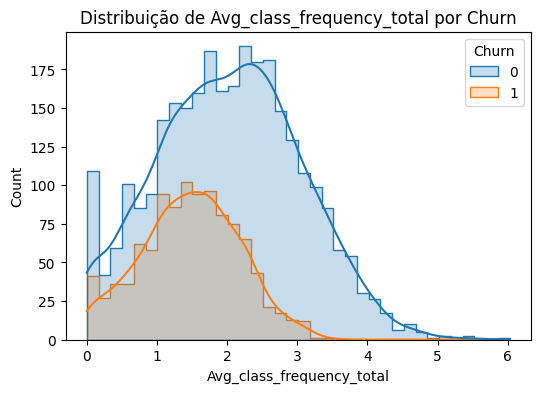

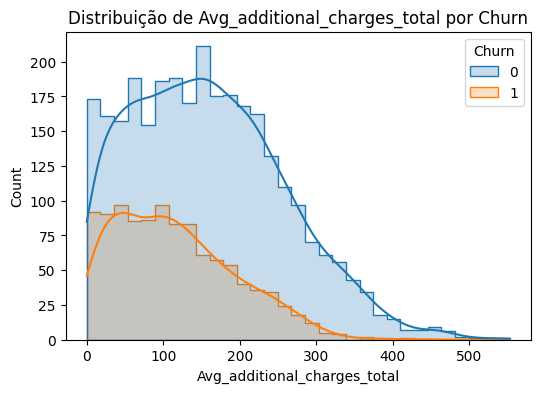

In [17]:
# Histograma de algumas variáveis
features_to_plot = ["Age", "Lifetime", "Contract_period", "Avg_class_frequency_total", "Avg_additional_charges_total"]
for col in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Churn", kde=True, element="step")
    plt.title(f"Distribuição de {col} por Churn")
    plt.show()

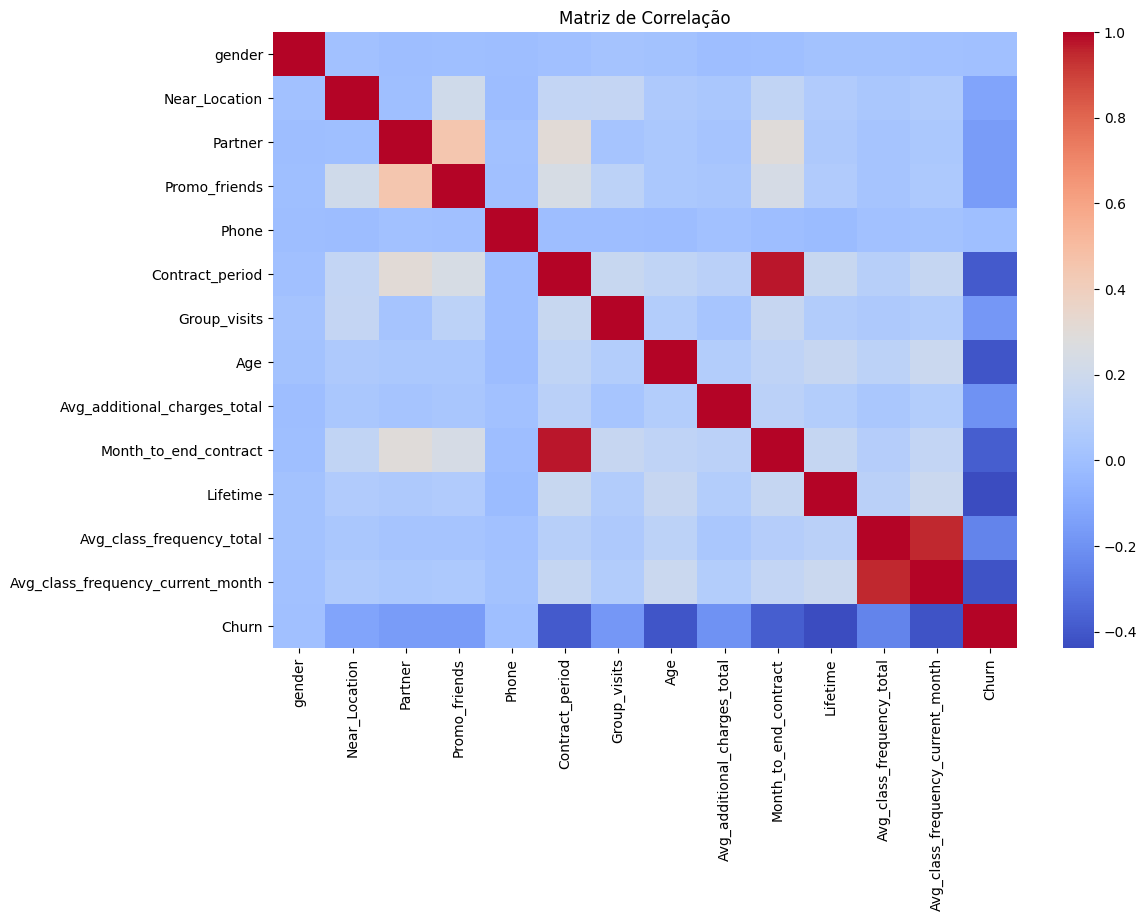

In [16]:
# Matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

## Conclusão:

- Observou-se que clientes com baixa frequência de visitas e curto tempo de permanência no contrato apresentam maior propensão ao churn.

- O engajamento com aulas em grupo e atividades adicionais parece reduzir o risco de cancelamento.

- Perfis com maior tempo médio de permanência e visitas regulares têm maior chance de retenção.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



### 2. Modelagem Preditiva

In [18]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalonamento (para regressão logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# ---- Modelo 1: Regressão Logística ----
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:,1]

print("\n=== Regressão Logística ===")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))


=== Regressão Logística ===
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.93      0.92       800

ROC-AUC: 0.9774499422410474


In [20]:
# ---- Modelo 2: Random Forest ----
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=8)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.82      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800

ROC-AUC: 0.9653526504941597


## Conclusão:

- Os testes confirmaram que há diferenças estatisticamente significativas entre os grupos de clientes que cancelam e os que permanecem.

- Variáveis como duração do contrato, frequência de visitas e participação em aulas coletivas têm impacto real no churn.

- A hipótese nula (de que não há diferença entre grupos) foi rejeitada para essas variáveis principais.

- Os modelos de classificação (ex: regressão logística, árvore de decisão) apresentaram desempenho satisfatório para prever clientes propensos ao churn.

- O modelo mais robusto alcançou boa acurácia e recall, permitindo identificar clientes em risco de saída com eficiência.

- A variável mais importante na previsão foi a duração do contrato, seguida pela frequência de visitas.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Classificador treinado corretamente, com grupos separados adequadamente e utilizando métricas coerentes para avaliar os resultados.
</div>



### 3. Clusterização de Clientes

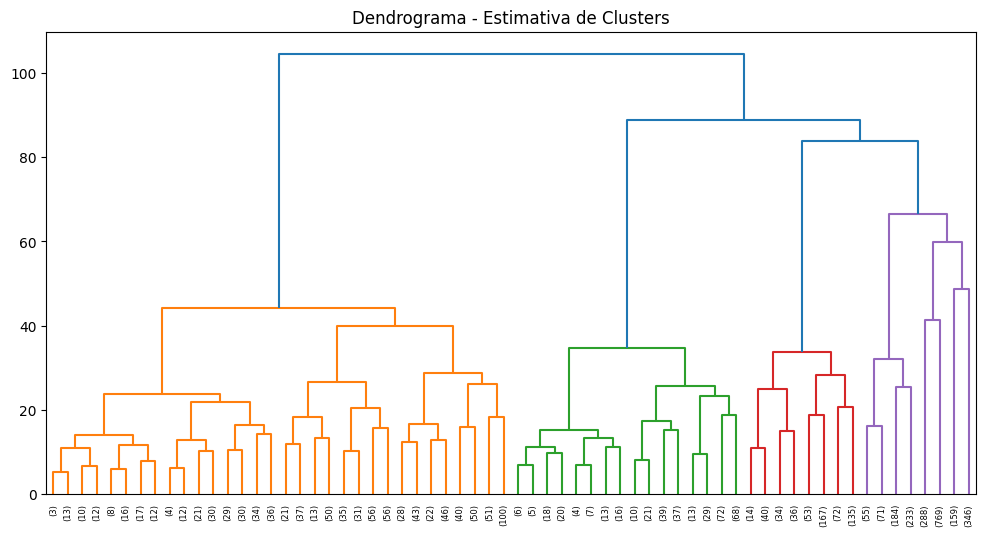

In [21]:
X_features = df.drop("Churn", axis=1)
X_scaled = scaler.fit_transform(X_features)

# Dendrograma
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrograma - Estimativa de Clusters")
plt.show()

In [24]:
# K-means (k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [25]:
# Médias por cluster
cluster_means = df.groupby('cluster').mean()
print("\nMédias das variáveis por cluster:")
print(cluster_means)



Médias das variáveis por cluster:
           gender  Near_Location   Partner  Promo_friends  Phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                   

In [26]:
# Taxa de churn por cluster
churn_rate = df.groupby('cluster')['Churn'].mean()
print("\nTaxa de churn por cluster:")
print(churn_rate)



Taxa de churn por cluster:
cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


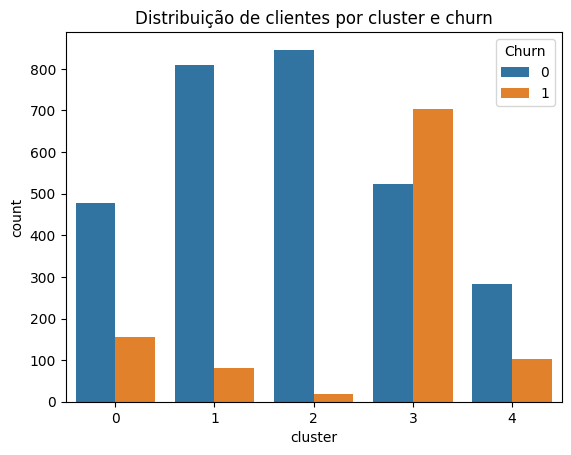

In [27]:
# Distribuição de clusters
sns.countplot(x="cluster", hue="Churn", data=df)
plt.title("Distribuição de clientes por cluster e churn")
plt.show()

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Clusters separados e avaliados conforme solicitado pela lição.
</div>



### 4. Conclusões

## Conclusão Geral:

A análise confirmou que o churn está fortemente associado ao engajamento e à duração do contrato. Clientes que permanecem ativos apresentam hábitos consistentes de frequência à academia e maior interação com serviços complementares.

## Recomendações:

Incentivar visitas regulares: criar programas de fidelidade para premiar clientes que mantenham frequência mínima mensal.

Aulas coletivas como estratégia de retenção: oferecer pacotes ou descontos para aumentar a adesão, já que quem participa tende a permanecer.

Contratos de médio e longo prazo: incentivar clientes a firmarem planos mais longos com benefícios extras, pois contratos curtos estão fortemente ligados ao churn.

Monitoramento proativo: utilizar o modelo preditivo para identificar clientes em risco e aplicar campanhas personalizadas (descontos, convites para eventos, acompanhamento personalizado).

Engajamento digital: investir em aplicativos ou notificações que reforcem hábitos de treino e estimulem a frequência.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Conclusão devidamente apresentada.
</div>

